Notebook demonstrating logistic regression on two different datasets and the use of regularization

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import special, optimize

In [2]:
#load data for both parts of exercise
data1 = np.loadtxt('/Users/newowner/Desktop/DataScienceNotes/machine-learning-ex2/ex2/ex2data1.txt', delimiter=',')
data2 = np.loadtxt('/Users/newowner/Desktop/DataScienceNotes/machine-learning-ex2/ex2/ex2data2.txt', delimiter=',')

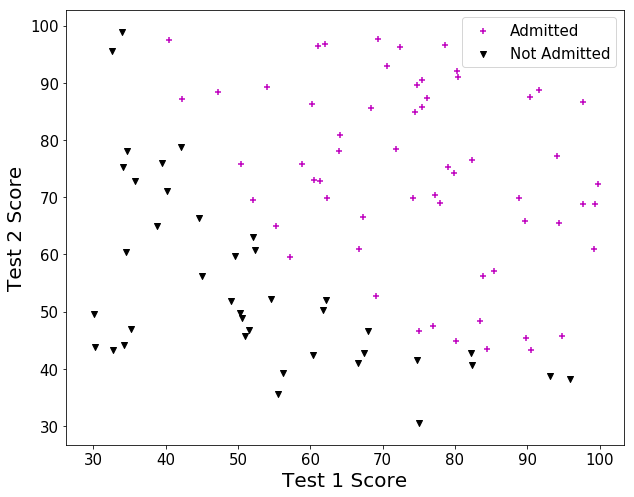

In [3]:
# visualize first data set

fig = plt.figure(figsize = (10,8))

pos = np.where(data1[:,2]==1)
neg = np.where(data1[:,2]==0)

plt.scatter(data1[pos, 0], data1[pos, 1], marker = '+', color = 'm', label='Admitted')
plt.scatter(data1[neg, 0], data1[neg, 1], marker = 'v', color='k', label ='Not Admitted')
plt.xlabel('Test 1 Score', fontsize = 20)
plt.ylabel('Test 2 Score', fontsize = 20)
plt.tick_params(labelsize=15)
plt.legend(fontsize=15)
plt.show()

For logistic regression our hypothesis takes the form $h_\theta(x) = g(\theta^Tx)$ where $g(z) = \frac{1}{1+e^{-z}}$ is the sigmoid function. Here we will practice writing our own sigmoid function. We can produce the same results with the SciPy by using scipy.special.expit(x). 

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

The cost function for logistic regression is: 

\begin{equation}
    J(\theta) = \frac{-1}{m} \sum_{i=1}^m [y^{(i)}log(h_\theta(x^{(i)})) + (1-y^{(i)})log(1-h_\theta(x^{(i)})]
\end{equation}

And the gradient is:

\begin{equation}
    \frac{\partial{J(\theta)}}{\partial{\theta_j}} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}
\end{equation}

This has the same form as the gradient for linear regression, but the hypothesis functions are different. 

In [5]:
def costFunction(theta, x, y):
    theta = theta.reshape(len(theta), 1)
    m = len(y)
    h = sigmoid(np.matmul(x, theta))
    J = (-1.0/m)*np.sum(np.matmul(np.transpose(np.log(h)), y) + np.matmul(np.transpose(np.log(1-h)), (1-y)))
    
    grad = (1.0/m) * np.matmul(x.T, (h-y))
    
    return J, grad.reshape(len(grad),)

In [6]:
# set up data:

x = data1[:, :2]
x = np.column_stack((np.ones(len(x)), x))
y = data1[:, 2].reshape((len(x), 1))

In [7]:
# test cost function with two different initial thetas 
theta = np.zeros((3, 1))
J, grad= costFunction(theta, x, y)
print('When initial theta is \n{} \nthe cost function is {} and the gradient is \n{}.\n').format(theta, J, grad)

theta = np.array([[-24], [0.2], [0.2]])
J, grad= costFunction(theta, x, y)
print('When initial theta is \n{} \nthe cost function is {} and the gradient is \n{}.').format(theta, J, grad)

When initial theta is 
[[ 0.]
 [ 0.]
 [ 0.]] 
the cost function is 0.69314718056 and the gradient is 
[ -0.1        -12.00921659 -11.26284221].

When initial theta is 
[[-24. ]
 [  0.2]
 [  0.2]] 
the cost function is 0.218330193827 and the gradient is 
[ 0.04290299  2.56623412  2.64679737].


When we ran linear regression we were able to use gradient descent to find the values of $\theta$ that minimized the cost function. This time we will use a built-in SciPy function scipy.optmize.fmin_tnc, which minimizes a function using gradient information. This function can take in the cost function if it returns both J and the gradient. 

In [8]:
import scipy.optimize as opt
theta = np.zeros((3,1))
result = opt.fmin_tnc(func=costFunction, x0=theta, args=(x,y))
J, grad = costFunction(result[0], x, y)
print('Cost found using SciPy optimization is {} with theta as {}'.format(J, result[0]))

Cost found using SciPy optimization is 0.203497701589 with theta as [-25.16131866   0.20623159   0.20147149]


In [9]:
result[0][0]

-25.161318664451485

Now using our values of theta we can plot the decision boundary on our dataset. Recall that our hypothesis is $h_\theta(x) = g(\theta^T x)$ and the boundary line will occur when $h_\theta(x) = 0.5$, or when $\theta^T x = 0$. 

So we can take $\theta^T x = \theta_0 + \theta_1 x_1 + \theta_2 x_2$ and rearrange to solve for $x_2 = -(\theta_0 + \theta_1 x_1)/\theta_2$. 

To create our boundary line we'll take the end points of the boundary line. 

In [10]:
xmin = np.min(x[:,1])
xmax = np.max(x[:,1])
ymin = (-1/result[0][2]) * (result[0][1]*xmin + result[0][0])
ymax = (-1/result[0][2]) * (result[0][1]*xmax + result[0][0])

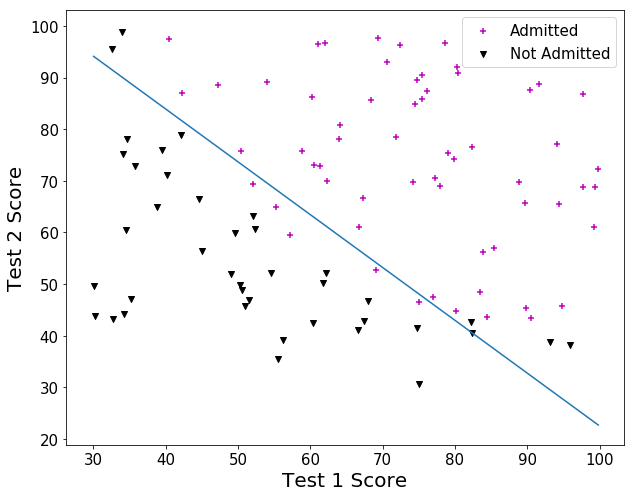

In [11]:
figure = plt.figure(figsize=(10,8))

pos = np.where(data1[:,2]==1)
neg = np.where(data1[:,2]==0)

plt.scatter(data1[pos, 0], data1[pos, 1], marker = '+', color = 'm', label='Admitted')
plt.scatter(data1[neg, 0], data1[neg, 1], marker = 'v', color='k', label ='Not Admitted')
plt.plot((xmin, xmax), (ymin, ymax))
plt.plot()
plt.xlabel('Test 1 Score', fontsize = 20)
plt.ylabel('Test 2 Score', fontsize = 20)
plt.tick_params(labelsize=15)
plt.legend(fontsize=15)
plt.show()

Now that we have our theta values we can use them to predict the probability that a student is admitted given their test scores. 

In [12]:
predict = sigmoid(np.dot(np.array([1, 45, 85]), result[0]))
print('For a student with scores 45 and 85 we predict an {}% chance of being accepted').format(predict*100)

For a student with scores 45 and 85 we predict an 77.6290623948% chance of being accepted


We can also compute the accuracy of our training set using our learned theta.

In [13]:
def predict(theta, x):
    m = x.shape[0]
    p = np.zeros((m, 1))
    predict = sigmoid(np.matmul(x,theta))
    p = predict >= 0.5
    return map(int, p)

In [14]:
predict_val = np.array(predict(result[0], x))
how_accurate = map(int, [predict_val[i]==y[i] for i in range(len(y))])
accuracy = np.mean(how_accurate)*100

print('Train accuracy is {}'.format(accuracy))

Train accuracy is 89.0


In the second part of the exercise we'll use regularized logistic regression with a new data set. 

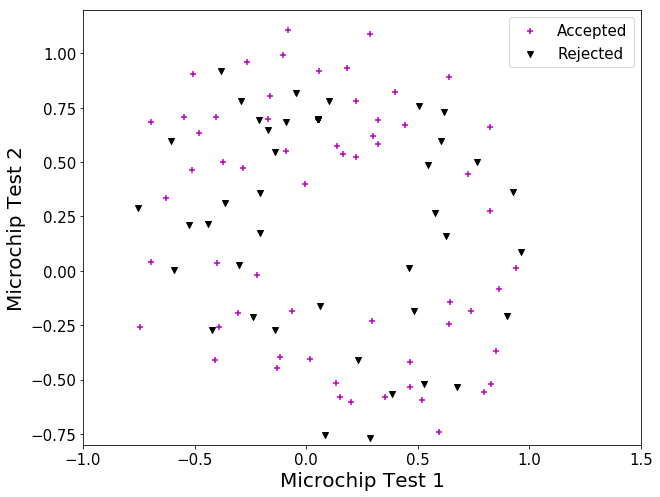

In [15]:
# visualize the second data set

fig = plt.figure(figsize = (10, 8))

pos = np.where(y==1)
neg = np.where(y==0)

plt.scatter(data2[pos, 0], data2[pos, 1], marker = '+', color = 'm', label='Accepted')
plt.scatter(data2[neg, 0], data2[neg, 1], marker = 'v', color='k', label ='Rejected')
plt.xlabel('Microchip Test 1', fontsize = 20)
plt.ylabel('Microchip Test 2', fontsize = 20)
plt.xlim(-1, 1.5)
plt.ylim(-0.8, 1.2)
plt.tick_params(labelsize=15)
plt.legend(fontsize=15)
plt.show()

In [16]:
x = data2[:,:2]
y = data2[:,2]

It is clear from looking at a plot of the data that the accepted and rejected points cannot be separated by a straight line. One way to create a more complex boundary line is to add more features to our hypothesis. Instead of taking more data to come up with more features we can just combine different powers of the features we already have. This process is called feature mapping. 

scikit Learn has a built-in function that will perform the mapping for us. 

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(6)
x_new = poly.fit_transform(x)

In this case we have created a new 28-dimensional vector made up of different powers of the features $x_1$ and $x_2$. Each column in this vector is a combination of the features up to the sixth power, so $[1, x_1, x_2, x_1^2, x_1x_2, x_2^2, ..., x_2^6]$. 

One problem of adding more features is that your model can become prone to overfitting. To combat this we will add regularization to our cost function and gradient. 

With regularization the cost function becomes:

\begin{equation}
    J(\theta) = \frac{-1}{m} \sum_{i=1}^m [y^{(i)}log(h_\theta(x^{(i)})) + (1-y^{(i)})log(1-h_\theta(x^{(i)})] + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2
\end{equation}

Note that the $\theta_0$ paramter is not used in the regularization term. 

The gradient becomes:
\begin{equation}
    \frac{\partial{J(\theta)}}{\partial{\theta_0}} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}, j=0
\end{equation}

\begin{equation}
    \frac{\partial{J(\theta)}}{\partial{\theta_j}} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} + \frac{\lambda}{m}\theta_j, j\geq 1
\end{equation}

In [18]:
def costFunctionReg(theta, x, y, lam):
    m = len(y)
    h = sigmoid(np.matmul(x, theta))
    J_orig = (-1.0/m)*np.sum(np.matmul(np.transpose(np.log(h)), y) + np.matmul(np.transpose(np.log(1-h)), (1-y)))
    theta[0] = 0
    reg = (float(lam)/(2*m)) * np.dot(theta.T, theta)
    J = J_orig + reg
    
    grad_orig = (1.0/m) * np.matmul(x.T, (h-y))
    grad = grad_orig + (float(lam)/m)*theta
    
    return J, grad

In [19]:
theta = np.zeros(28)
J, grad = costFunctionReg(theta, x_new, y, 1)
print('Cost at initial theta (zeros): {}\nGradient (first five values only): {}\n'.format(J, grad[:5], 2))

theta = np.ones(28)
J, grad = costFunctionReg(theta, x_new, y, 10)
print('Cost when theta is ones: {}\nGradient (first five values only): {}\n'.format(J, grad[:5], 2))

Cost at initial theta (zeros): 0.69314718056
Gradient (first five values only): [  8.47457627e-03   1.87880932e-02   7.77711864e-05   5.03446395e-02
   1.15013308e-02]

Cost when theta is ones: 3.16450933162
Gradient (first five values only): [ 0.34604507  0.16135192  0.19479576  0.22686278  0.09218568]



Now we can use our regularized functions to find the optimal theta values. We will do this again with the built-in SciPy optimize function. 

In [20]:
theta = np.zeros(28)
result = opt.fmin_tnc(func=costFunctionReg, x0=theta, args=(x_new,y,1))
J, grad = costFunctionReg(result[0], x_new, y, 1)
print('Cost found using SciPy optimization is {} with theta {}'.format(J, result[0]))

Cost found using SciPy optimization is 0.627293175378 with theta [ 0.         -0.00602678  0.39178174 -0.45600961 -0.16345793 -0.14868218
 -0.08286217 -0.05165688 -0.07950305 -0.03803831 -0.39959042 -0.02030655
 -0.12467638 -0.04280454 -0.27166961 -0.1471552  -0.04113254 -0.0263212
 -0.05234922 -0.05335967 -0.18084989 -0.3162826  -0.00485562 -0.0674712
 -0.00138271 -0.07169554 -0.01909383 -0.29410672]


In [21]:
predict_val = np.array(predict(result[0], x_new))
how_accurate = map(int, [predict_val[i]==y[i] for i in range(len(y))])
accuracy = np.mean(how_accurate)*100

print('Train accuracy is {}'.format(accuracy))

Train accuracy is 66.1016949153
